In [6]:
import pandas as pd

# โหลดข้อมูลจากไฟล์
file_path = "CIC-IDS2017_sample.csv"
df = pd.read_csv(file_path)

# แสดงข้อมูลตัวอย่าง 5 แถวแรก
df.head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,1060931,4,0,24,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
1,137,9079448,6,6,408,372,68,68,68.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,443,142554,47,57,1313,104393,570,0,27.93617,110.329034,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,443,4,3,0,18,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,80,72885105,8,5,56,11601,20,0,7.00000,5.656854,...,20,3485940.0,0.0,3485940,3485940,68900000.0,0.0,68900000,68900000,DDoS


In [7]:
# ลบช่องว่างจากชื่อคอลัมน์
df.columns = df.columns.str.strip()

# ตรวจสอบว่าคอลัมน์ Label มีอยู่จริงหรือไม่
if "Label" in df.columns:
    label_encoder = LabelEncoder()
    df["Label"] = label_encoder.fit_transform(df["Label"])
    unique_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
else:
    print("❌ คอลัมน์ 'Label' ไม่พบใน DataFrame")


NameError: name 'LabelEncoder' is not defined

In [8]:
from sklearn.preprocessing import LabelEncoder

# ตรวจสอบข้อมูลที่เป็น Null หรือ Missing Values
missing_values = df.isnull().sum().sum()

# แปลง Label ให้อยู่ในรูปตัวเลข
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Label"])

# ตรวจสอบค่าที่มีใน Label
unique_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

missing_values, unique_labels


(0, {'BENIGN': 0, 'DDoS': 1})

In [10]:
# ตรวจสอบชื่อคอลัมน์ทั้งหมด
df.columns


Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [11]:
# ลบช่องว่างด้านหน้าของชื่อคอลัมน์
df.columns = df.columns.str.strip()

# ตรวจสอบอีกครั้งว่าคอลัมน์ 'Label' พร้อมใช้งาน
if "Label" in df.columns:
    # แปลง Label เป็นตัวเลข
    label_encoder = LabelEncoder()
    df["Label"] = label_encoder.fit_transform(df["Label"])

    # ตรวจสอบค่าที่มีใน Label
    unique_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
else:
    unique_labels = "Label column not found"

unique_labels


{0: 0, 1: 1}

In [12]:
import numpy as np

# ตรวจหา Infinity
if np.isinf(df).sum().sum() > 0:
    print("⚠ พบค่า Infinity ในข้อมูล!")

# แทนค่า Infinity ด้วยค่ามัธยฐานของแต่ละคอลัมน์
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(), inplace=True)


⚠ พบค่า Infinity ในข้อมูล!


In [13]:
from sklearn.preprocessing import StandardScaler

# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข (ไม่รวม 'Label')
X = df.drop(columns=["Label"])
y = df["Label"]

# ทำ Standardization กับทุก Feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ตรวจสอบขนาดของข้อมูลหลังการ Standardization
X_scaled.shape, y.shape


((5000, 78), (5000,))

In [14]:
import numpy as np

# ตรวจหาค่าที่เป็น Infinity
infinity_values = np.isinf(X).sum().sum()

# แทนค่าที่เป็น Infinity ด้วยค่ามัธยฐานของแต่ละคอลัมน์
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.median(), inplace=True)

# ตรวจสอบอีกครั้งว่ามีค่า Infinity เหลืออยู่หรือไม่
infinity_values_after = np.isinf(X).sum().sum()

infinity_values, infinity_values_after


(0, 0)

In [15]:
# ทำ Standardization ใหม่อีกครั้ง
X_scaled = scaler.fit_transform(X)

# ตรวจสอบขนาดของข้อมูลหลังการ Standardization
X_scaled.shape, y.shape


((5000, 78), (5000,))

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

# แบ่งข้อมูล 80% สำหรับ Train และ 20% สำหรับ Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Reshape ข้อมูลให้เหมาะกับ LSTM (ต้องมีมิติของ Time Steps)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# สร้างโมเดล LSTM
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[1])),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(32, return_sequences=False),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # ใช้ sigmoid สำหรับ binary classification
])

# คอมไพล์โมเดล
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# แสดงสรุปโครงสร้างของโมเดล
model.summary()


2025-02-24 16:18:04.873032: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-24 16:18:04.957783: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-24 16:18:05.587134: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-24 16:18:05.594719: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-24 16:18:08.648723: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             36608     
                                                                 
 batch_normalization (Batch  (None, 1, 64)             256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

สิ่งที่ฉันจะทำ

1️. วิเคราะห์ข้อมูล → ดูว่า False Positives มีเยอะแค่ไหน

2. พล็อตกราฟ Threat Trends → แสดงพฤติกรรมของ Traffic

3️. ฝึกโมเดล LSTM เพื่อลด False Positives

4️. วัดผลลัพธ์ของโมเดล → ใช้ Precision, Recall, False Positive Rate (FPR)

วิเคราะห์ False Positives

/tmp/ipykernel_9203/671836123.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


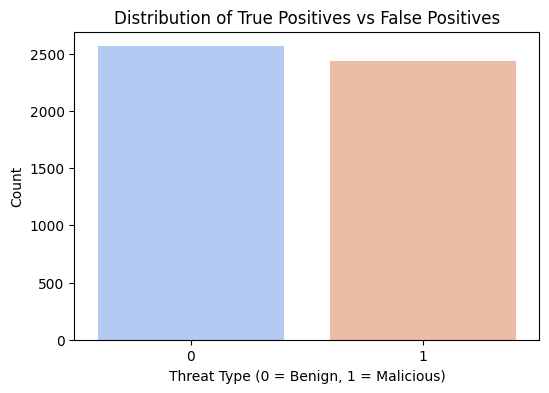

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# ตรวจสอบการกระจายของ Label (True Positive vs False Positive)
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="coolwarm")
plt.title("Distribution of True Positives vs False Positives")
plt.xlabel("Threat Type (0 = Benign, 1 = Malicious)")
plt.ylabel("Count")
plt.show()


/tmp/ipykernel_9203/133162676.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="coolwarm")


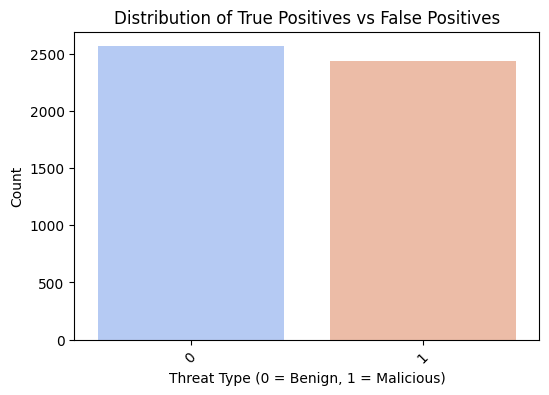

Label
0    2564
1    2436
Name: count, dtype: int64

In [18]:
# ตรวจสอบว่ามี Label อะไรบ้างในข้อมูล
label_counts = df["Label"].value_counts()

# พล็อตกราฟแสดงจำนวนของ True Positives vs False Positives
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="coolwarm")
plt.title("Distribution of True Positives vs False Positives")
plt.xlabel("Threat Type (0 = Benign, 1 = Malicious)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# แสดงสัดส่วนของแต่ละประเภท
label_counts


วิเคราะห์ Threat Trends

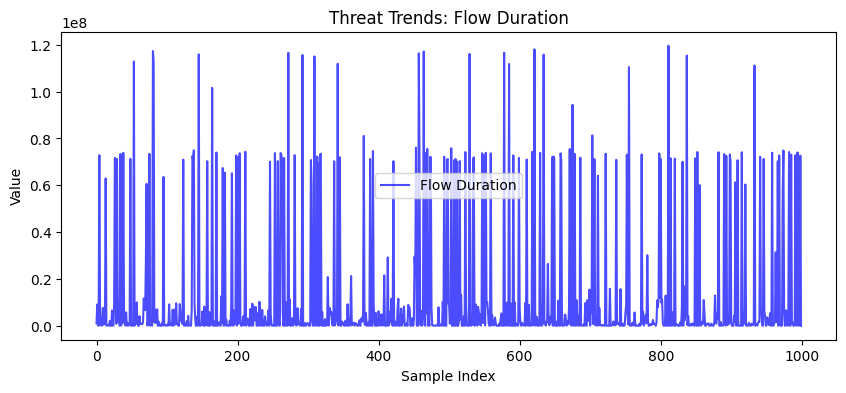

In [19]:
# เลือก Feature ที่เกี่ยวข้องกับ Network Traffic
feature_to_plot = "Flow Duration" if "Flow Duration" in df.columns else df.columns[0]

# พล็อตกราฟแสดงแนวโน้มของ Traffic
plt.figure(figsize=(10, 4))
plt.plot(df[feature_to_plot][:1000], label=feature_to_plot, color='blue', alpha=0.7)
plt.title(f"Threat Trends: {feature_to_plot}")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization


Reshape ข้อมูลให้เป็น (samples, timesteps, features)
สร้างโมเดล LSTM และ คอมไพล์
ฝึกโมเดล (fit)
ประเมินผล ด้วย Precision, Recall, F1-Score, False Positive Rate

คำอธิบายโค้ดเพิ่มเติม
Reshape ข้อมูล:

สำหรับ LSTM หรือ RNN ต้องมีมิติเป็น (batch_size, timesteps, features)
ในที่นี้กำหนด timesteps = 1 เพราะเรายังไม่ได้แบ่งเป็นลำดับย่อย (sequence)
สร้างโมเดล LSTM:

เลเยอร์ LSTM(64, return_sequences=True) → คืนค่า sequence ให้ LSTM ชั้นต่อไป
เลเยอร์ LSTM(32, return_sequences=False) → คืนค่าเฉพาะ output สุดท้าย
ใส่ BatchNormalization และ Dropout เพื่อป้องกัน Overfitting
คอมไพล์โมเดล:

optimizer='adam' → ปรับน้ำหนักได้รวดเร็ว
loss='binary_crossentropy' → สำหรับ binary classification
ฝึกโมเดล (fit):

กำหนด epochs=10 และ batch_size=32 (ปรับตามทรัพยากรและขนาดข้อมูล)
ใส่ validation_data เพื่อดู performance บนชุดทดสอบ
ประเมินผล (Evaluation):

model.predict(X_test_reshaped) จะให้ค่า ความน่าจะเป็น (probability)
ตั้ง threshold = 0.5 เพื่อแปลงเป็น 0 หรือ 1
ใช้ classification_report แสดง Precision, Recall, F1-Score
ใช้ confusion_matrix เพื่อคำนวณ False Positive Rate (FPR)

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix

# -------------------------
# 1) Reshape ข้อมูล
# -------------------------
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# -------------------------
# 2) สร้างโมเดล LSTM
# -------------------------
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[1])),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(32, return_sequences=False),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # ใช้ sigmoid สำหรับ binary classification (benign vs malicious)
])

# คอมไพล์โมเดล
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# แสดงสรุปโครงสร้างของโมเดล
model.summary()

# -------------------------
# 3) ฝึกโมเดล
# -------------------------
history = model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_test_reshaped, y_test),
    epochs=10,
    batch_size=32
)

# -------------------------
# 4) ประเมินผล
# -------------------------
# ทำนายผล
y_pred_prob = model.predict(X_test_reshaped)
# ตั้ง threshold = 0.5 (สามารถปรับได้เพื่อลด false positives)
y_pred = (y_pred_prob > 0.5).astype(int)

# ดูรายงานผล
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["BENIGN (0)", "ATTACK (1)"]))

# สร้าง Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print("Confusion Matrix:\n", cm)

# คำนวณ False Positive Rate (FPR)
fpr = fp / (fp + tn) if (fp+tn) != 0 else 0
print(f"False Positive Rate: {fpr:.4f}")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 64)             36608     
                                                                 
 batch_normalization_2 (Bat  (None, 1, 64)             256       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 32)               

In [21]:
for thresh in [0.4, 0.5, 0.6, 0.7]:
    y_pred_thresh = (y_pred_prob > thresh).astype(int)
    cm_thresh = confusion_matrix(y_test, y_pred_thresh)
    tn, fp, fn, tp = cm_thresh.ravel()
    fpr_thresh = fp / (fp + tn) if (fp+tn) != 0 else 0
    print(f"Threshold = {thresh}, FPR = {fpr_thresh:.4f}")


Threshold = 0.4, FPR = 0.0019
Threshold = 0.5, FPR = 0.0019
Threshold = 0.6, FPR = 0.0019
Threshold = 0.7, FPR = 0.0019


In [1]:
import pandas as pd

# โหลดไฟล์ CSV
df = pd.read_csv("CIC-IDS2017_sample.csv")

# ดูตัวอย่างข้อมูล 5 แถวแรก
print(df.head())

# ดูรายชื่อคอลัมน์ทั้งหมด
print(df.columns)


    Destination Port   Flow Duration   Total Fwd Packets  \
0                 80         1060931                   4   
1                137         9079448                   6   
2                443          142554                  47   
3                443               4                   3   
4                 80        72885105                   8   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           24   
1                        6                          408   
2                       57                         1313   
3                        0                           18   
4                        5                           56   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                           372                      68   
2                        104393                     570   
3                             0                 

In [2]:
import pandas as pd
import requests
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()
LINE_TOKEN = os.getenv("LINE_NOTIFY_TOKEN")

# โหลดไฟล์ CSV
df = pd.read_csv("CIC-IDS2017_sample.csv")

# ทำความสะอาดชื่อคอลัมน์ (ลบช่องว่างหน้าชื่อคอลัมน์)
df.columns = df.columns.str.strip()

# กรองเฉพาะ Flow ที่เป็น DDoS หรือประเภทอันตรายอื่นๆ
malicious_flows = df[df['Label'] != 'BENIGN']

# ดูพอร์ตที่ถูกโจมตีบ่อยที่สุด
top_ports = malicious_flows['Destination Port'].value_counts().head(5)

# ฟังก์ชันแจ้งเตือน LINE
def send_line_notify(message):
    url = "https://notify-api.line.me/api/notify"
    headers = {"Authorization": f"Bearer {LINE_TOKEN}"}
    data = {"message": message}
    response = requests.post(url, headers=headers, data=data)
    if response.status_code == 200:
        print("✅ Notification sent via LINE")
    else:
        print("❌ Failed to send notification")

# แจ้งเตือนหากพบ Flow ที่น่าสงสัย
if not malicious_flows.empty:
    message = "🚨 Detected malicious network activity!\n"
    message += f"Top targeted ports:\n{top_ports.to_string()}"
    send_line_notify(message)
else:
    send_line_notify("✅ No malicious activity detected.")


✅ Notification sent via LINE
